In [36]:
import os

In [37]:
!python time.py torch

In [38]:
!python time.py tf

/Users/scott/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-12-09 15:02:28.386286: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


In [39]:
!python time.py tf-eager

/Users/scott/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-12-09 15:02:39.979460: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA


In [40]:
from altair import Chart, X, Y, Scale
import pandas as pd

DIR = "data/"
dfs = [pd.read_csv(DIR + f + ".csv") for f in ["torch", "tf", "tf-eager"]]
df = pd.concat(dfs)
df[df.library == 'torch'].describe()

,Unnamed: 0,max_iter,n,time
count,1000.000000,1000.0,1.000000e+03,1.000000e+03
mean,499.500000,100.0,1.560935e+06,9.679794e-07
std,288.819436,0.0,3.009259e+06,2.042118e-06
min,0.000000,100.0,1.000000e+03,0.000000e+00
25%,249.750000,100.0,7.742000e+03,9.536743e-07
50%,499.500000,100.0,1.133790e+05,9.536743e-07
75%,749.250000,100.0,1.291549e+06,9.536743e-07
max,999.000000,100.0,1.000000e+07,5.817413e-05


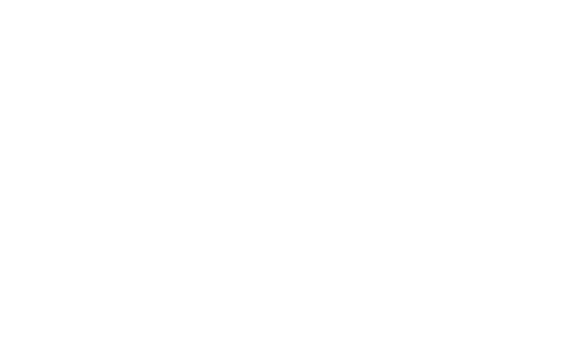

In [41]:
Chart(df).mark_line().encode(
    x=X('n', scale=Scale(type='log')),
    # had to use mean; min(torch_times) == 0, so they don't show in log plot
    y=Y('mean(time)', scale=Scale(type='linear')),
    color='library')

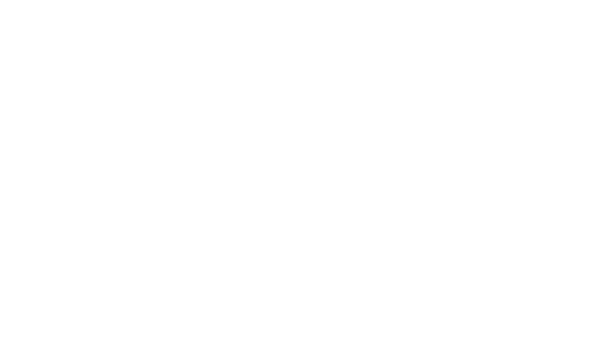

In [42]:
Chart(df).mark_line().encode(
    x=X('n', scale=Scale(type='log')),
    # had to use mean; min(torch_times) == 0, so they don't show in log plot
    y=Y('median(time)', scale=Scale(type='log')),
    color='library'
)

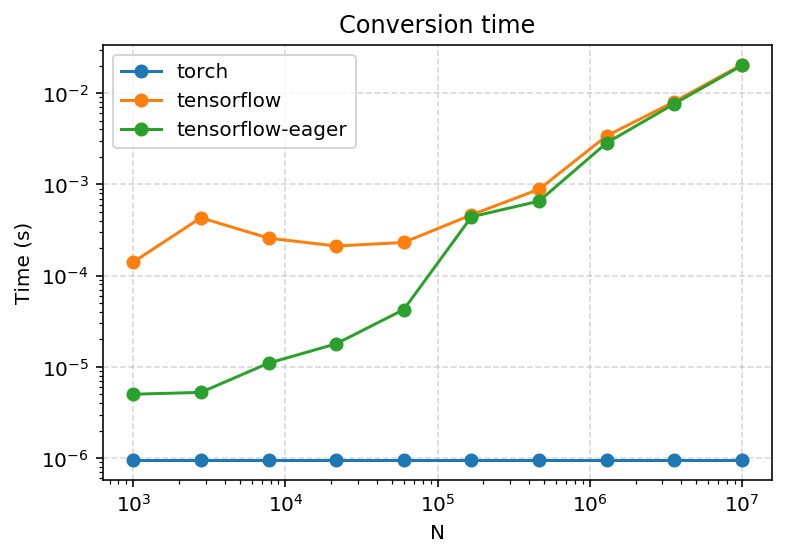

In [49]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for library in df.library.unique():
    show = df[df.library == library]
    lines = show.groupby("n")["time"].median()
    lines.plot(ax=ax, logx=True, logy=True, style="o-", label=library)
ax.legend(loc="best")
ax.set_ylabel("Time (s)")
ax.set_xlabel("N")
ax.set_title("Conversion time")
ax.grid(linestyle="--", alpha=0.5)
plt.savefig("images/conversion.svg")